In [167]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
import matplotlib.pyplot as plt
import os
import gc
%matplotlib inline
import datetime
from tqdm import tqdm
from collections import Counter
import random
import matplotlib.pyplot as plt     
  
plt.rcParams['axes.unicode_minus'] = False      
from joblib import Parallel, delayed

In [168]:
df = pd.read_excel('players.csv')

In [169]:

df['NAME'] = df['SCORING'].apply(lambda x: "".join(x.split()[:-1]) )
y = df['NAME']
del df['NAME']
df.insert(1,'NAME' ,y)

df['TEAM'] = df['SCORING'].apply(lambda x: x.split()[-1])
y = df['TEAM']
del df['TEAM']
df.insert(2,'TEAM' ,y)

# del df['SCORING']

In [170]:
df.head(5)

,SCORING,NAME,TEAM,GP,GS,MPG,PPG,PTS/48,PTS,FGM/G,FGA/G,FG%,3FGM/G,3FGA/G,3FG%,FTM/G,FTA/G,FT%,HIGH,PPS
0,"1 Harden, James HOU","1Harden,James",HOU,61,61,36.7,34.4,44.9,2096,9.9,22.7,0.435,4.4,12.6,0.352,10.1,11.8,0.861,60.0,1.51
1,"2 Beal, Bradley WAS","2Beal,Bradley",WAS,57,57,36.0,30.5,40.7,1741,10.4,22.9,0.455,3.0,8.4,0.353,6.8,8.0,0.842,55.0,1.34
2,"3 Antetokounmpo, Giannis MIL","3Antetokounmpo,Giannis",MIL,57,57,30.9,29.6,46.0,1690,10.9,20.0,0.547,1.5,4.8,0.306,6.3,10.0,0.633,50.0,1.48
3,"4 Young, Trae ATL","4Young,Trae",ATL,60,60,35.3,29.6,40.3,1778,9.1,20.8,0.437,3.4,9.5,0.361,8.0,9.3,0.860,50.0,1.42
4,"5 Lillard, Damian POR","5Lillard,Damian",POR,58,58,36.9,28.9,37.6,1677,9.2,20.0,0.457,3.9,9.9,0.394,6.7,7.6,0.888,61.0,1.44


In [171]:
df['SCORING'] = df['SCORING'].apply(lambda x: ' '.join(x.split()) )

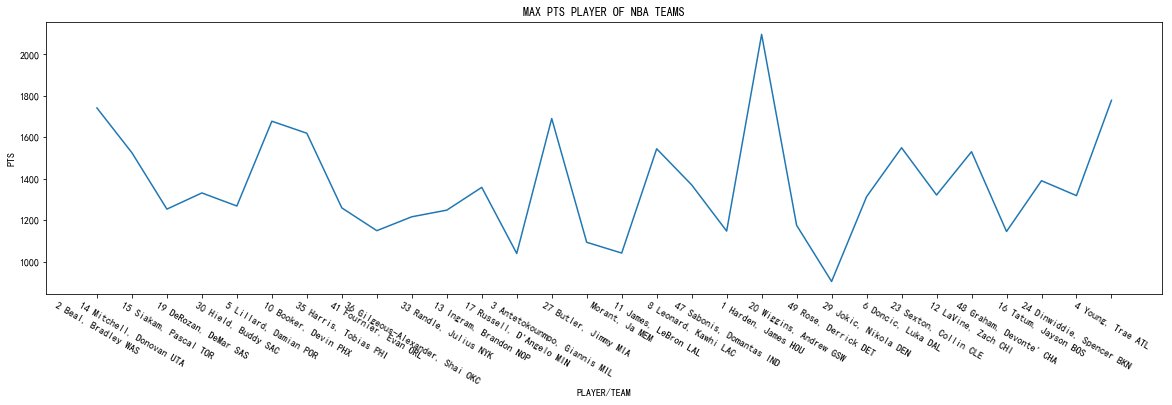

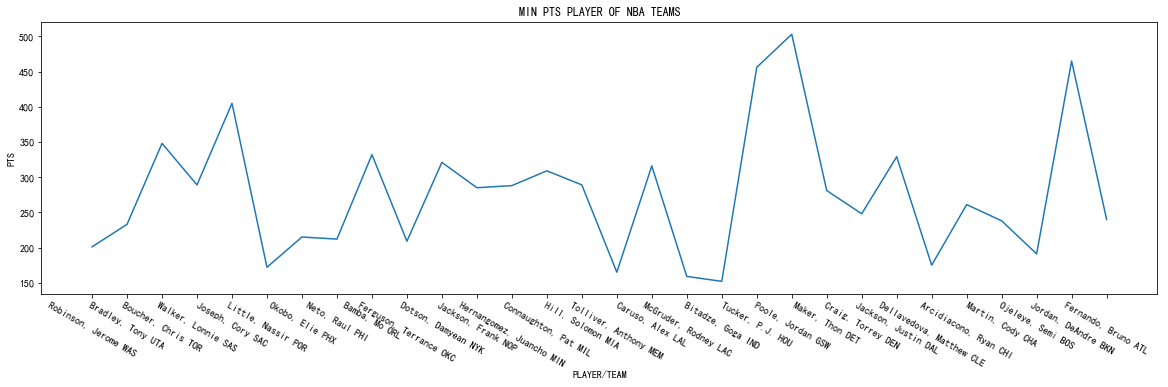

In [172]:

df_ = df.sort_values(by = ['TEAM' , 'PTS'] , ascending = False).groupby('TEAM').head(1)

plt.figure(figsize = (20,5))
plt.plot(df_['SCORING'] , df_['PTS'])
plt.xlabel('PLAYER/TEAM')
plt.ylabel('PTS')
plt.xticks(rotation=-30)
plt.title('MAX PTS PLAYER OF NBA TEAMS')
plt.show()


df_ = df.sort_values(by = ['TEAM' , 'PTS'] , ascending = False).groupby('TEAM').tail(1)

plt.figure(figsize = (20,5))
plt.plot(df_['SCORING'] , df_['PTS'])
plt.xlabel('PLAYER/TEAM')
plt.ylabel('PTS')
plt.xticks(rotation=-30)
plt.title('MIN PTS PLAYER OF NBA TEAMS')
plt.show()

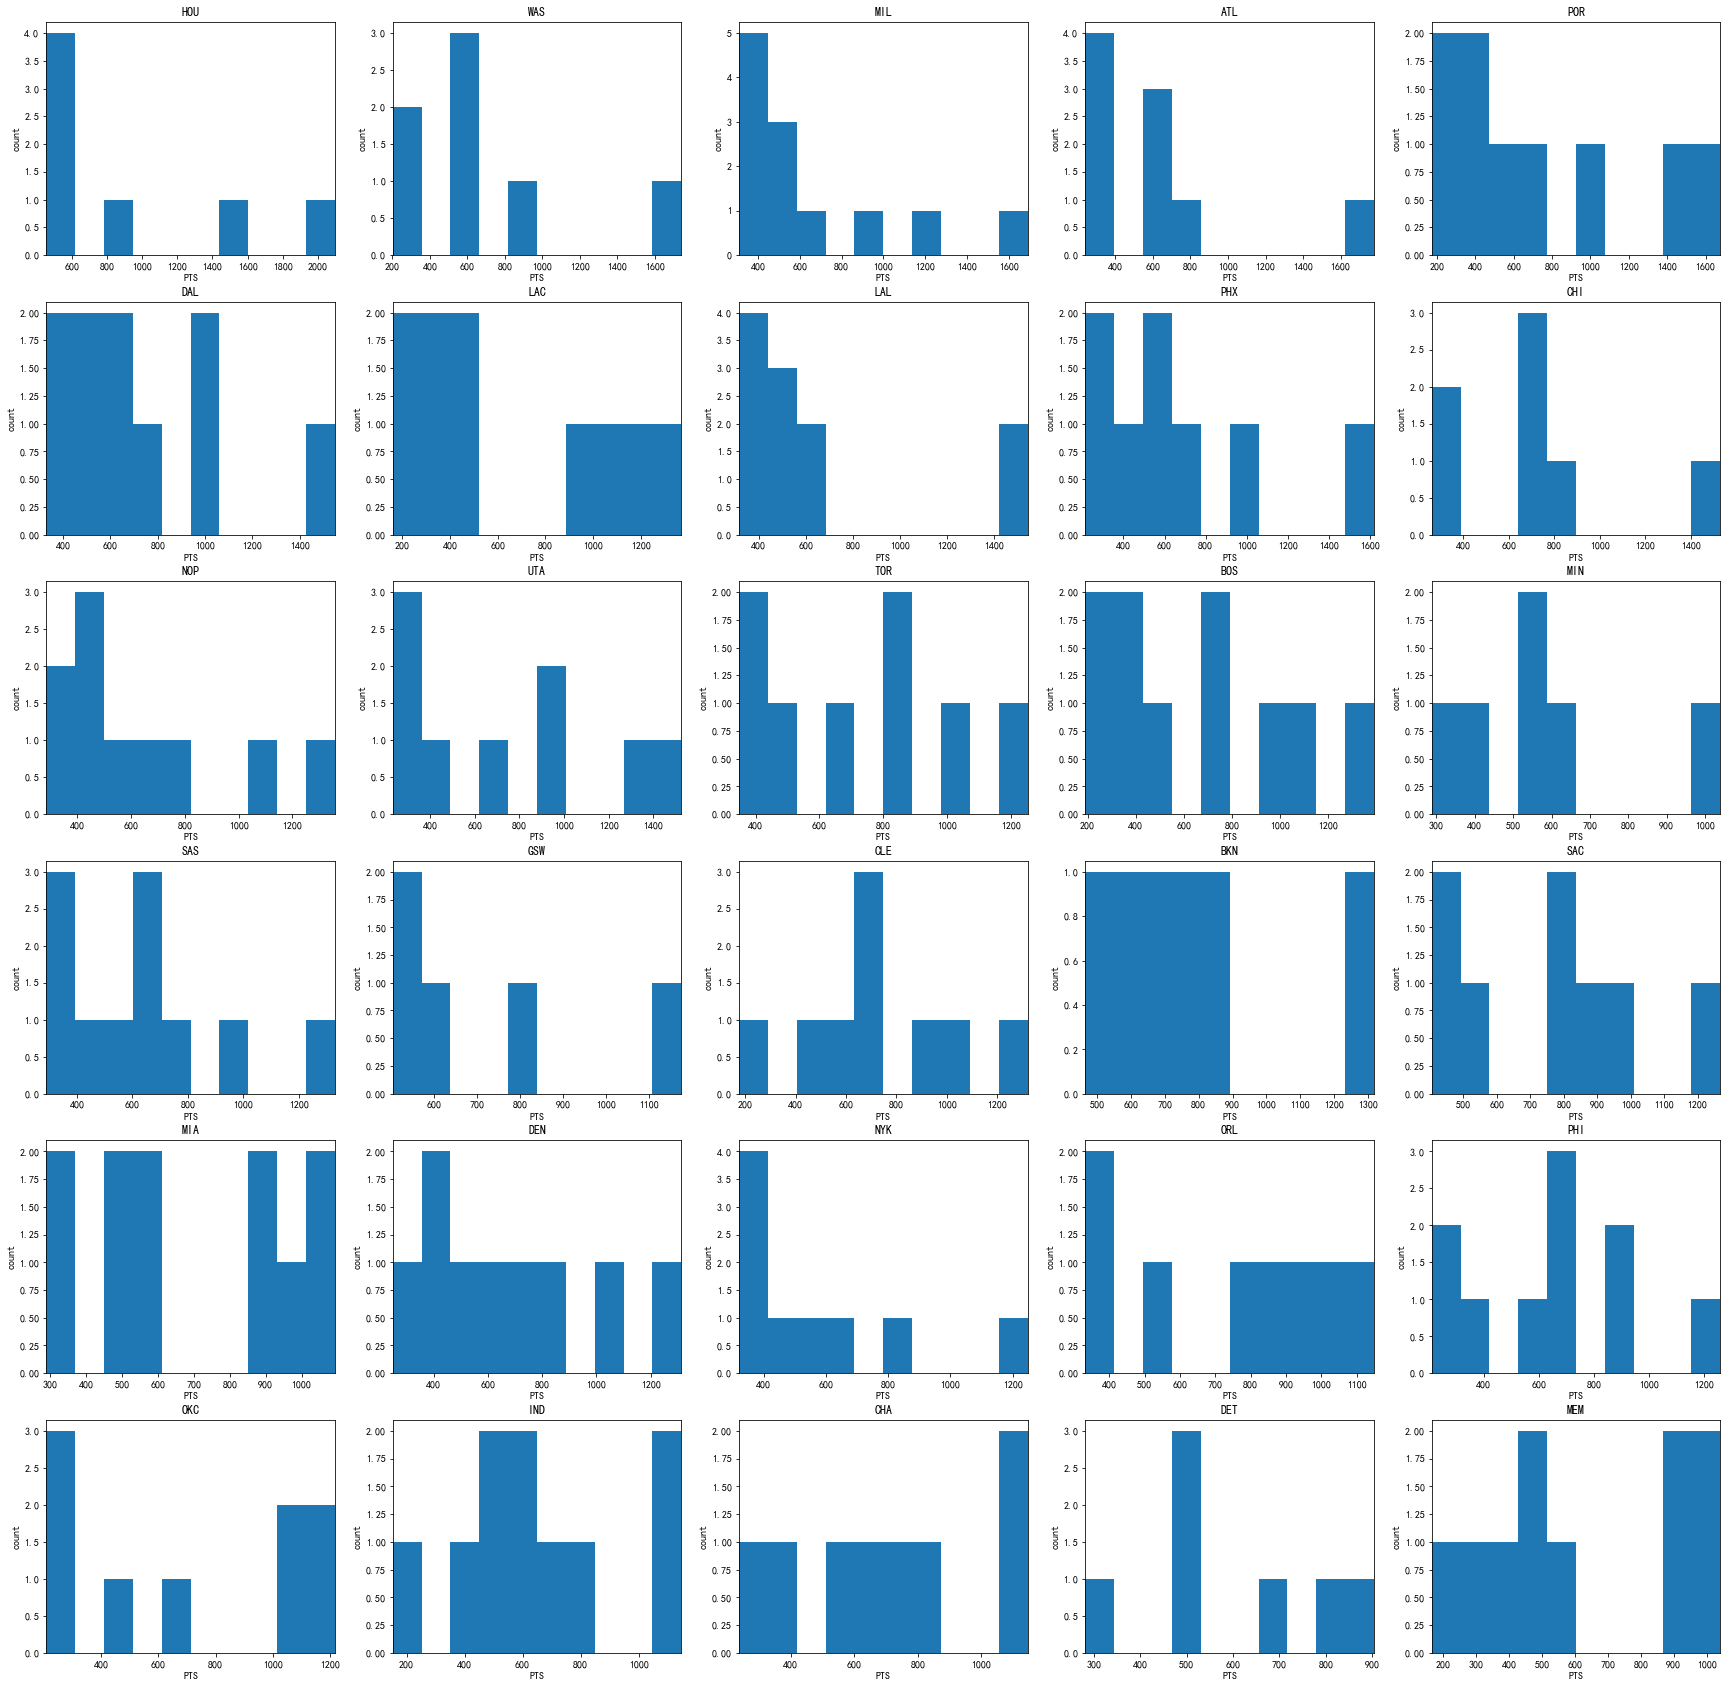

In [173]:

team_unique = df.TEAM.unique()

plt.figure(figsize = (30,30))

for i in range(len(team_unique)):
    plt.subplot(6,5,i+1)
    team_i = team_unique[i]
    df_i = df[df['TEAM'] ==team_i]
    plt.hist(df_i['PTS'] , bins = 10)
    plt.xlim(df_i['PTS'].min() , df_i['PTS'].max())
    plt.title(team_unique[i])
    plt.xlabel('PTS')
    plt.ylabel('count')

In [174]:
df_grp = df.groupby('TEAM').mean().reset_index()
cols = df_grp.columns.tolist()

cols_new = [f + '_mean' if f!= 'TEAM' else f for f in cols ]
df_grp.columns = cols_new

df_grp.head()

,TEAM,GP_mean,GS_mean,MPG_mean,PPG_mean,PTS/48_mean,PTS_mean,FGM/G_mean,FGA/G_mean,FG%_mean,3FGM/G_mean,3FGA/G_mean,FTM/G_mean,FTA/G_mean,FT%_mean,HIGH_mean,PPS_mean
0,ATL,58.000,31.222222,23.388889,10.533333,19.900000,619.777778,3.633333,8.522222,0.443333,1.244444,3.677778,1.988889,2.475000,0.763250,25.000000,1.232500
1,BKN,61.000,44.666667,27.816667,12.633333,21.466667,779.833333,4.566667,9.966667,0.492000,1.433333,4.216667,2.050000,2.816667,0.731667,26.333333,1.323333
2,BOS,55.200,31.700000,25.710000,12.670000,21.680000,674.100000,4.620000,9.970000,0.462600,1.400000,3.850000,2.030000,2.500000,0.811200,29.800000,1.264000
3,CHA,57.875,38.625000,26.625000,11.900000,20.875000,708.625000,4.312500,9.837500,0.451875,1.375000,3.900000,1.862500,2.512500,0.737625,28.125000,1.223750
4,CHI,59.000,32.428571,26.442857,12.200000,21.071429,723.285714,4.457143,10.342857,0.428571,1.571429,4.485714,1.742857,2.214286,0.761143,28.285714,1.165714


In [175]:
cols_x = df_grp.columns.tolist()[1:]
print(cols_x)

['GP_mean', 'GS_mean', 'MPG_mean', 'PPG_mean', 'PTS/48_mean', 'PTS_mean', 'FGM/G_mean', 'FGA/G_mean', 'FG%_mean', '3FGM/G_mean', '3FGA/G_mean', 'FTM/G_mean', 'FTA/G_mean', 'FT%_mean', 'HIGH_mean', 'PPS_mean']


In [176]:
df_grp.shape

(30, 17)

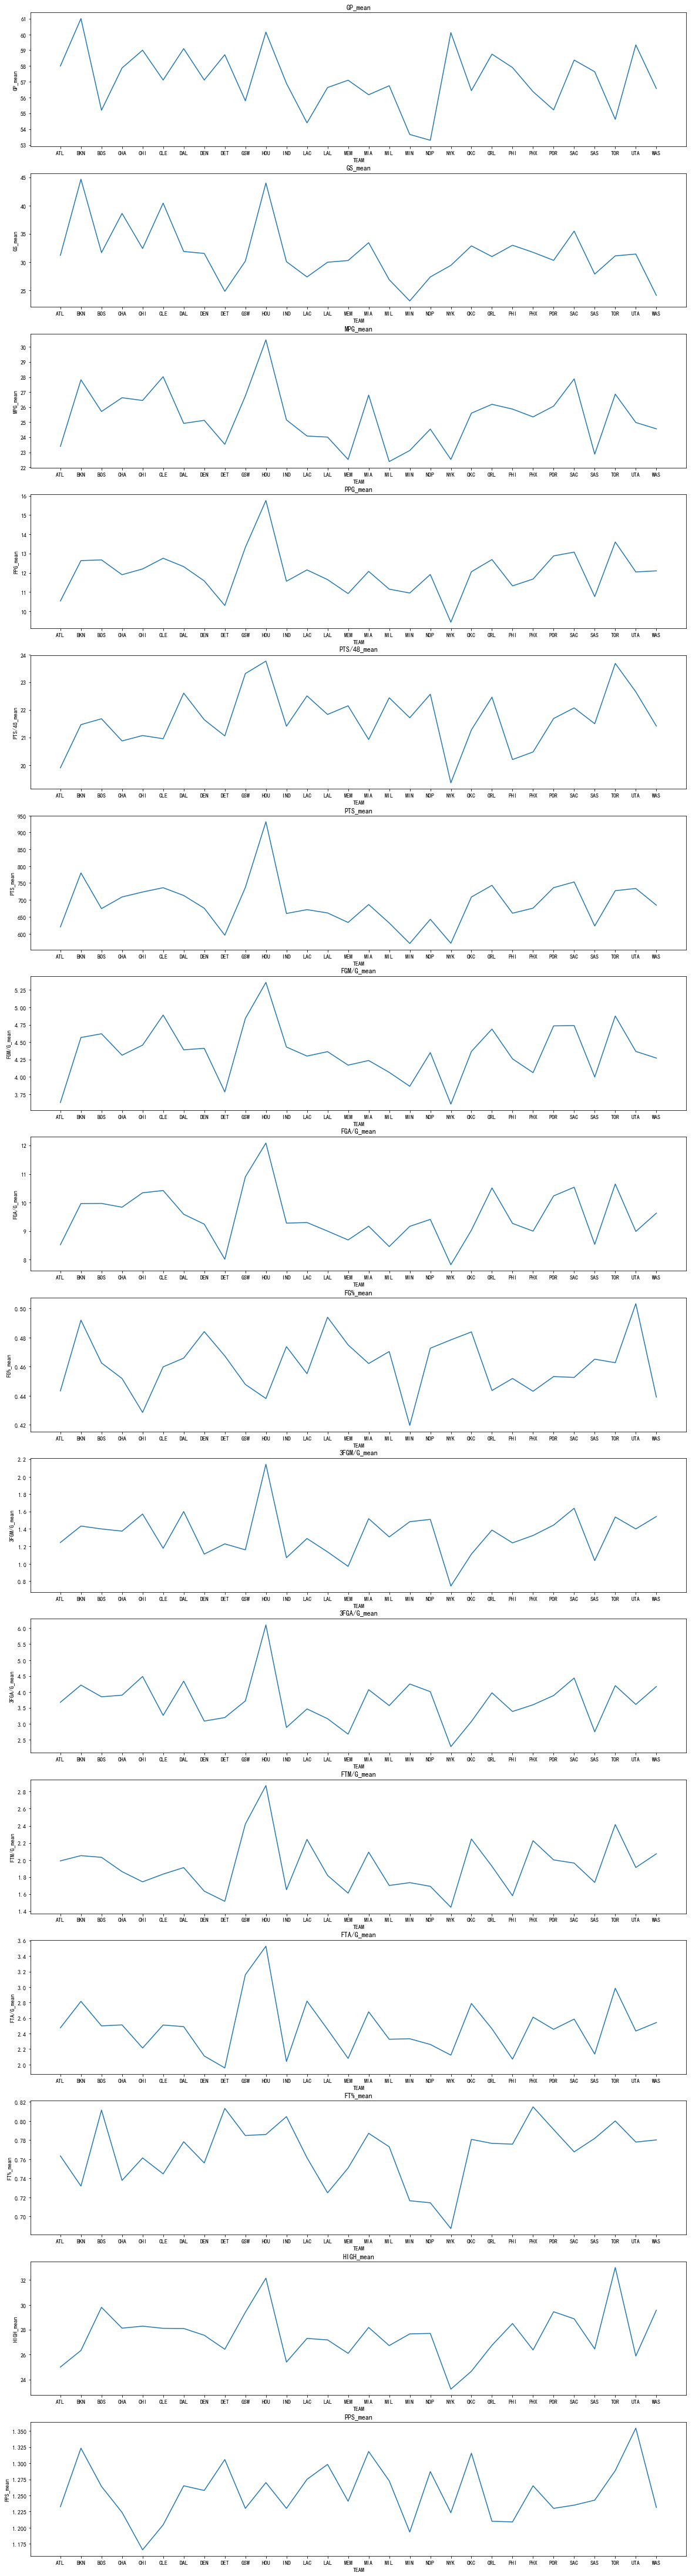

In [177]:

plt.figure(figsize = (20,5 * df_grp.shape[0]))

for i in range(len(cols_x)):
#     i  =0
    col = cols_x[i]
    plt.subplot(df_grp.shape[0] , 1 , i+1)
    plt.plot(df_grp['TEAM'] , df_grp[col])
    plt.title(col)
    plt.xlabel('TEAM')
    plt.ylabel(col)

In [178]:
df.index = df.SCORING.values
df = df.drop(['SCORING','NAME','TEAM'] , axis = 1)

df_init = df.copy()

df.head()

,GP,GS,MPG,PPG,PTS/48,PTS,FGM/G,FGA/G,FG%,3FGM/G,3FGA/G,3FG%,FTM/G,FTA/G,FT%,HIGH,PPS
"1 Harden, James HOU",61,61,36.7,34.4,44.9,2096,9.9,22.7,0.435,4.4,12.6,0.352,10.1,11.8,0.861,60.0,1.51
"2 Beal, Bradley WAS",57,57,36.0,30.5,40.7,1741,10.4,22.9,0.455,3.0,8.4,0.353,6.8,8.0,0.842,55.0,1.34
"3 Antetokounmpo, Giannis MIL",57,57,30.9,29.6,46.0,1690,10.9,20.0,0.547,1.5,4.8,0.306,6.3,10.0,0.633,50.0,1.48
"4 Young, Trae ATL",60,60,35.3,29.6,40.3,1778,9.1,20.8,0.437,3.4,9.5,0.361,8.0,9.3,0.860,50.0,1.42
"5 Lillard, Damian POR",58,58,36.9,28.9,37.6,1677,9.2,20.0,0.457,3.9,9.9,0.394,6.7,7.6,0.888,61.0,1.44


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 Harden, James HOU to Bitadze, Goga IND
Data columns (total 17 columns):
GP        263 non-null int64
GS        263 non-null int64
MPG       263 non-null float64
PPG       263 non-null float64
PTS/48    263 non-null float64
PTS       263 non-null int64
FGM/G     263 non-null float64
FGA/G     263 non-null float64
FG%       263 non-null float64
3FGM/G    263 non-null float64
3FGA/G    263 non-null float64
3FG%      263 non-null object
FTM/G     262 non-null float64
FTA/G     260 non-null float64
FT%       260 non-null float64
HIGH      260 non-null float64
PPS       260 non-null float64
dtypes: float64(13), int64(3), object(1)
memory usage: 37.0+ KB


In [180]:
df = df.fillna(0)
df[df['3FG%'] == '-'] = 0

In [181]:
cols_x = df.columns

for col in (cols_x):
    df[col] = (df[col]-df[col].min())/(df[col].max() - df[col].min())

In [182]:
X = df.values

In [183]:
from sklearn import cluster
from scipy.spatial.distance import cdist

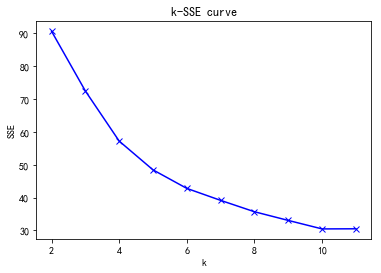

In [184]:
# plot k-euclidean figure to obtain best k value
K = range(2, 12)
meandistortions = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X)
#     meandistortions.append(sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0])
    meandistortions.append(kmeans.inertia_)
plt.figure()
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel(u'SSE')
plt.title('k-SSE curve')
plt.show()

In [185]:
def run_km(data , k_value):
    k_means = cluster.KMeans(n_clusters=k_value , random_state = 42)
    k_means.fit(data)
    clusters = k_means.labels_ 

    centroids = k_means.cluster_centers_
    centroids = pd.DataFrame(centroids , columns = data.columns.tolist())

    return centroids,clusters

In [193]:
# best k  = 5 and print dataframe player ... and label
centroids,clusters = run_km(df , k_value = 4)
df_init['label'] = clusters

df_init

,GP,GS,MPG,PPG,PTS/48,PTS,FGM/G,FGA/G,FG%,3FGM/G,3FGA/G,3FG%,FTM/G,FTA/G,FT%,HIGH,PPS,label
"1 Harden, James HOU",61,61,36.7,34.4,44.9,2096,9.9,22.7,0.435,4.4,12.6,0.352,10.1,11.8,0.861,60.0,1.51,1
"2 Beal, Bradley WAS",57,57,36.0,30.5,40.7,1741,10.4,22.9,0.455,3.0,8.4,0.353,6.8,8.0,0.842,55.0,1.34,1
"3 Antetokounmpo, Giannis MIL",57,57,30.9,29.6,46.0,1690,10.9,20.0,0.547,1.5,4.8,0.306,6.3,10.0,0.633,50.0,1.48,1
"4 Young, Trae ATL",60,60,35.3,29.6,40.3,1778,9.1,20.8,0.437,3.4,9.5,0.361,8.0,9.3,0.860,50.0,1.42,1
"5 Lillard, Damian POR",58,58,36.9,28.9,37.6,1677,9.2,20.0,0.457,3.9,9.9,0.394,6.7,7.6,0.888,61.0,1.44,1
"6 Doncic, Luka DAL",54,54,33.3,28.7,41.3,1549,9.5,20.6,0.461,2.9,9.1,0.318,6.8,9.1,0.752,42.0,1.39,1
"7 Westbrook, Russell HOU",53,53,35.9,27.5,36.7,1456,10.7,22.6,0.474,1.0,3.8,0.254,5.1,6.5,0.777,45.0,1.21,1
"8 Leonard, Kawhi LAC",51,51,32.2,26.9,40.0,1370,9.3,19.9,0.469,2.1,5.7,0.366,6.1,6.9,0.889,43.0,1.35,1
"9 Davis, Anthony LAL",55,55,34.3,26.7,37.3,1467,9.2,18.1,0.511,1.2,3.5,0.335,7.0,8.3,0.845,50.0,1.48,1
"10 Booker, Devin PHX",62,62,36.1,26.1,34.7,1619,8.8,18.0,0.487,2.0,5.6,0.36,6.5,7.1,0.916,44.0,1.45,1


In [191]:
df_init_new = df_init.groupby('label').mean().reset_index()

cols = df_init_new.columns
df_init_new.columns = [f + '_mean' if f!='label' else f for f in cols]

In [192]:
# print centers of per label
df_init_new

,label,GP_mean,GS_mean,MPG_mean,PPG_mean,PTS/48_mean,PTS_mean,FGM/G_mean,FGA/G_mean,FG%_mean,3FGM/G_mean,3FGA/G_mean,FTM/G_mean,FTA/G_mean,FT%_mean,HIGH_mean,PPS_mean
0,0,56.336000,9.448000,19.783200,7.790400,18.596000,443.152000,2.858400,6.307200,0.454320,0.988000,2.734400,1.087097,1.426016,0.758496,22.195122,1.233089
1,1,57.346154,54.173077,33.413462,21.928846,31.457692,1257.307692,7.726923,16.775000,0.460212,2.234615,6.140385,4.246154,5.201923,0.816923,40.980769,1.305385
2,2,58.123457,51.358025,28.393827,12.065432,20.311111,698.197531,4.525926,9.806173,0.466321,1.337037,3.704938,1.672840,2.225000,0.760525,27.337500,1.241000
3,3,57.800000,22.800000,23.100000,9.160000,18.560000,536.800000,3.660000,5.580000,0.653600,0.000000,0.000000,1.780000,2.920000,0.591600,20.600000,1.602000
